In [50]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import cross_val_score


In [52]:
df=pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [53]:
df.shape

(1030, 9)

In [54]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [55]:
df.duplicated().any()

True

In [56]:
df.duplicated().sum()

25

In [57]:
df=df.drop_duplicates()

In [58]:
df.duplicated().any()

False

In [59]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [60]:
X=df.drop('Strength',axis=1)
y=df['Strength']

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [62]:
LR=LinearRegression()
LR.fit(X_train,y_train)
prediction=LR.predict(X_test)
r2_score(y_test,prediction)

0.5801703029028777

In [63]:
np.mean(cross_val_score(LR,X,y,scoring='r2'))

0.47680010562839026

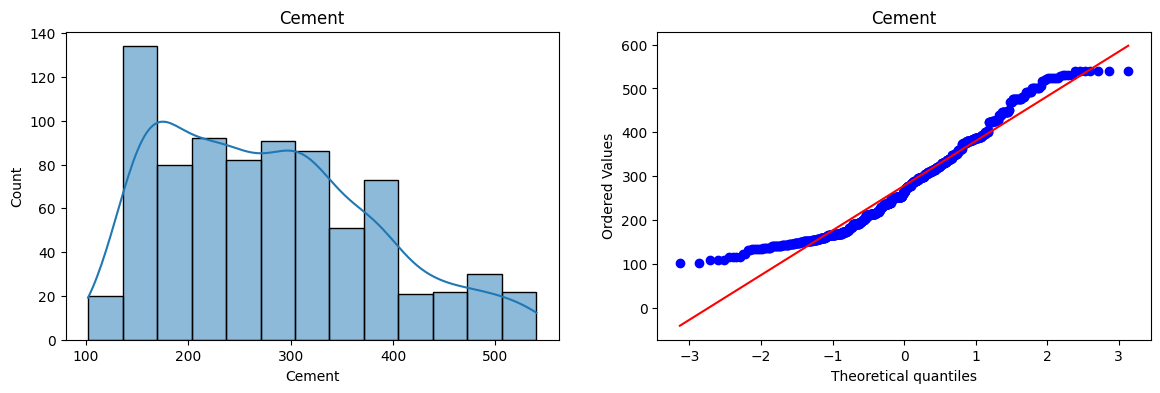

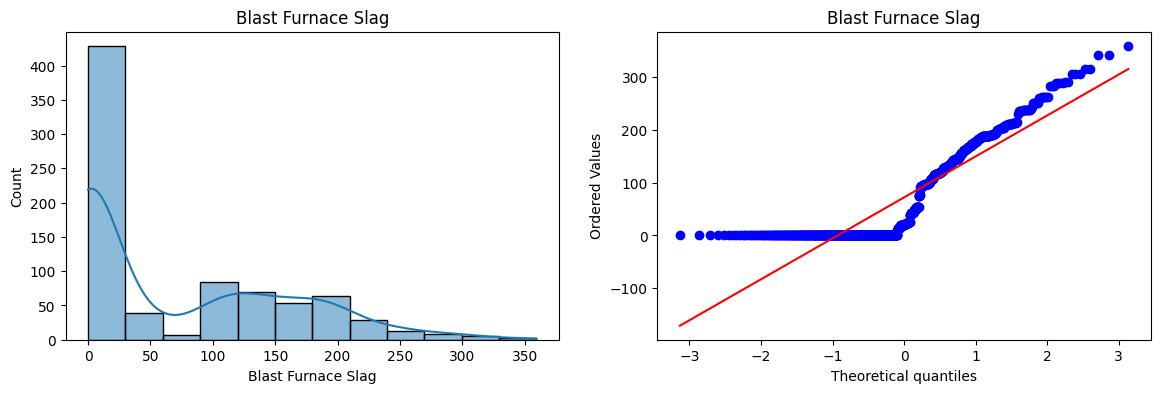

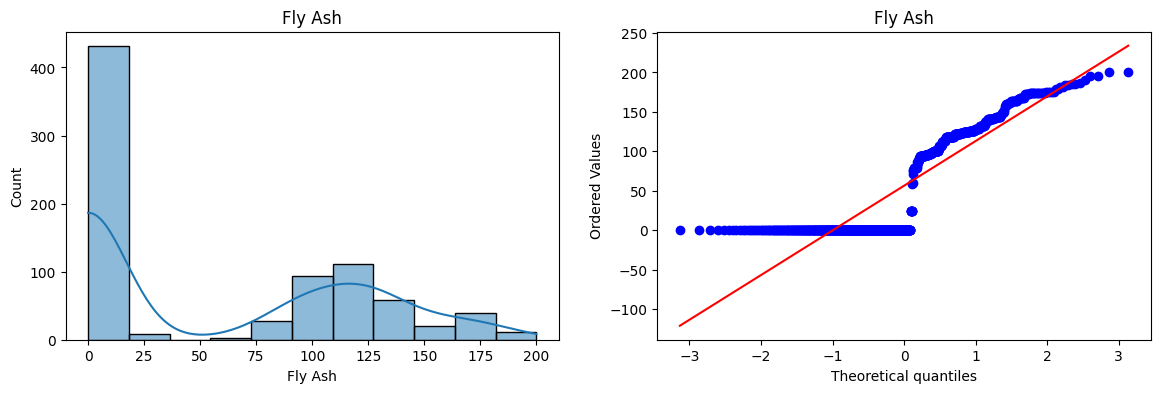

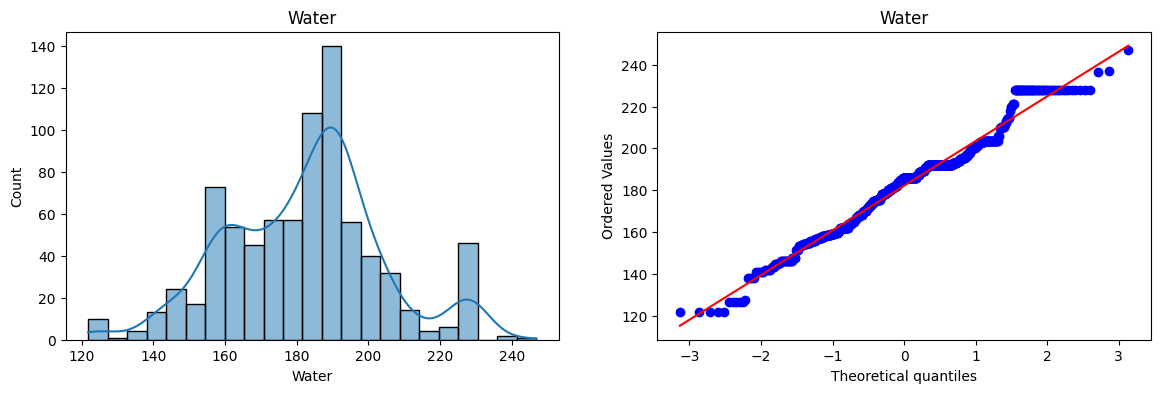

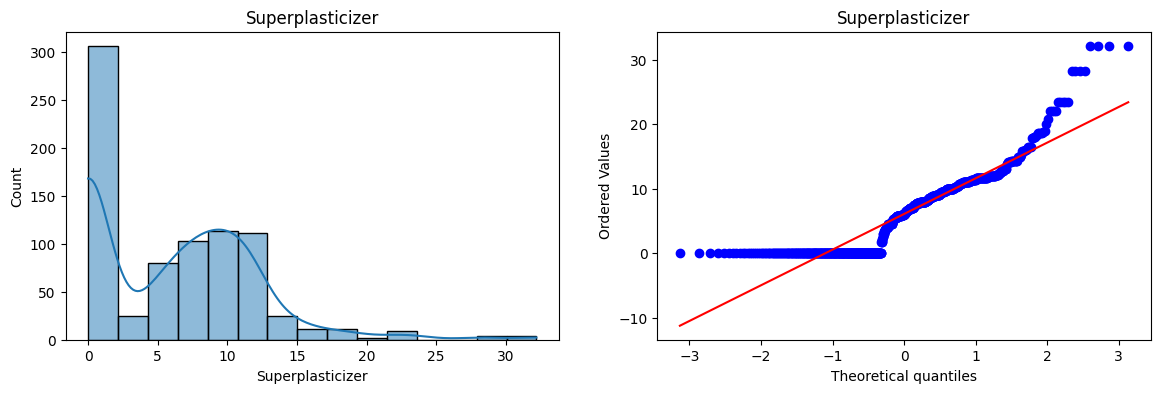

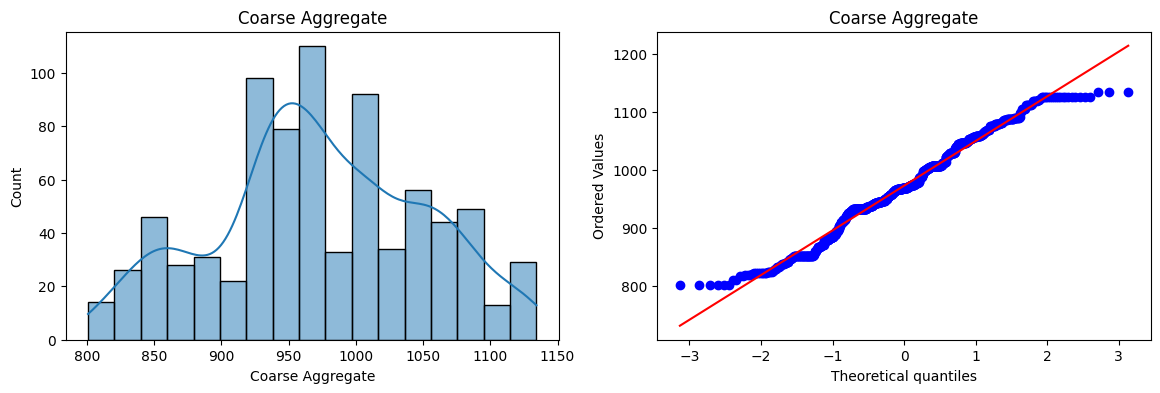

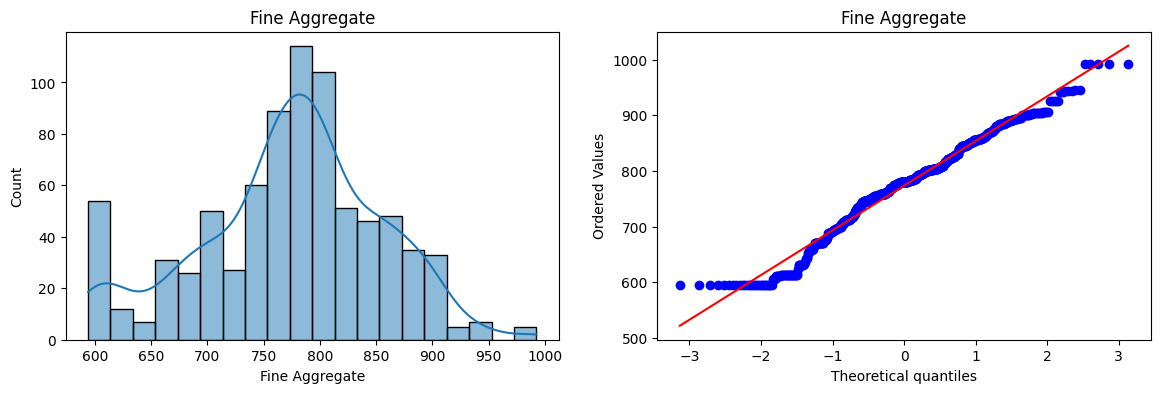

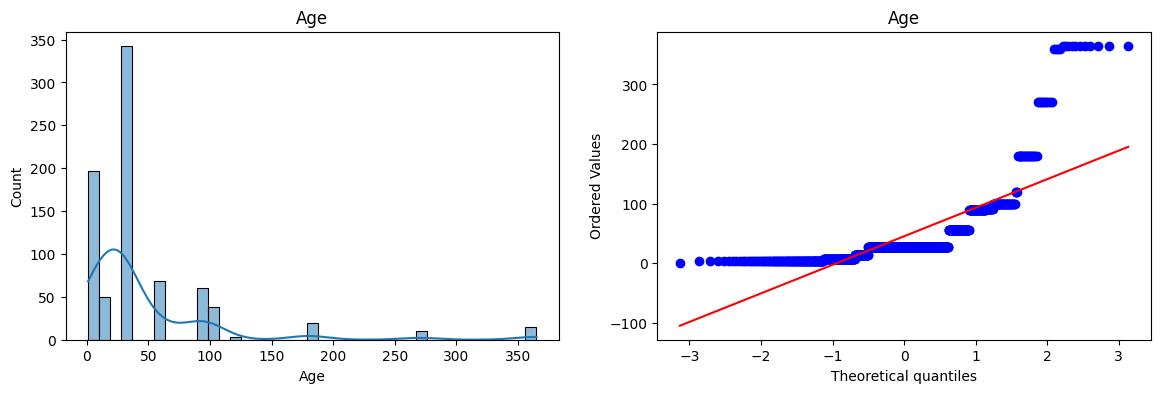

In [64]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(1,2,2)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)

    plt.show()




In [65]:
pt=PowerTransformer(method='box-cox')
X_train_transformed=pt.fit_transform(X_train+0.000001)
X_test_transformed=pt.transform(X_test+0.000001)

In [66]:
LR1=LinearRegression()
LR1.fit(X_train_transformed,y_train)
prediction1=LR1.predict(X_test_transformed)
r2_score(y_test,prediction1)

0.7940036249793315

In [67]:
X_transformed=pt.fit_transform(X+0.000001)
np.mean(cross_val_score(LR1,X_transformed,y,scoring='r2'))

0.6761744094272778

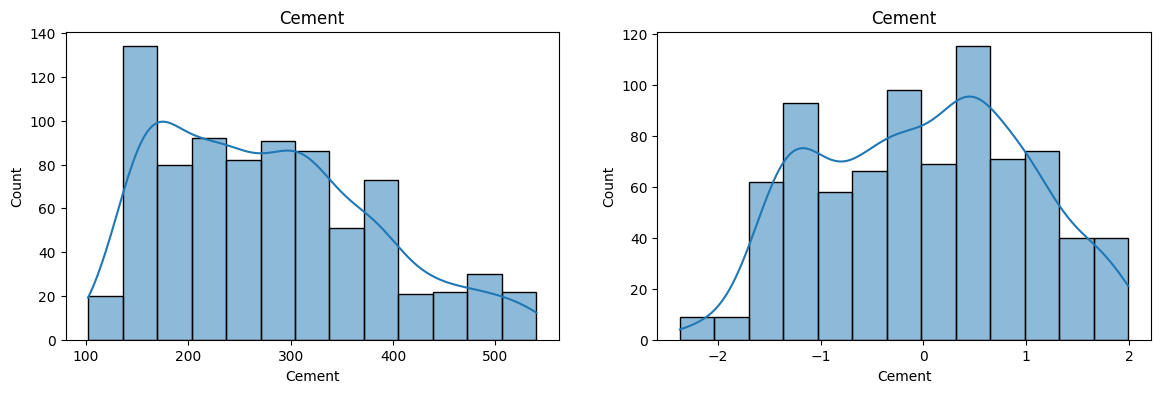

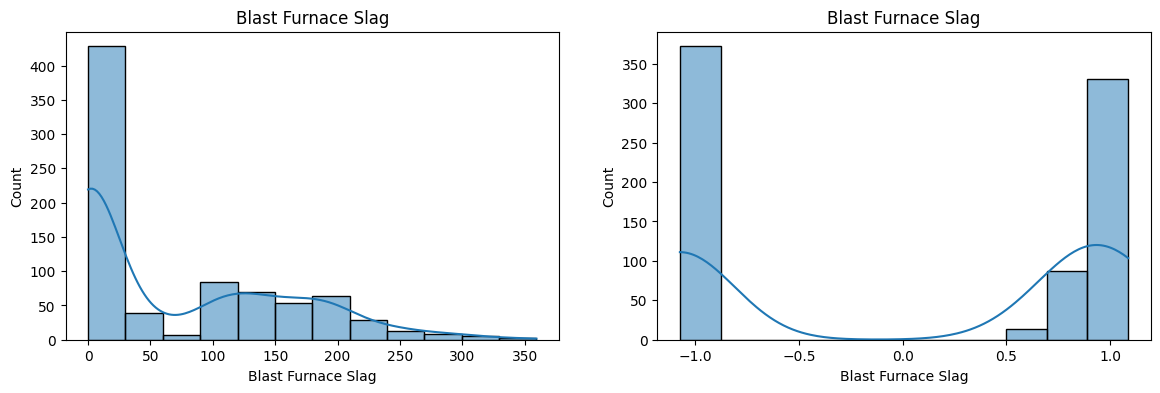

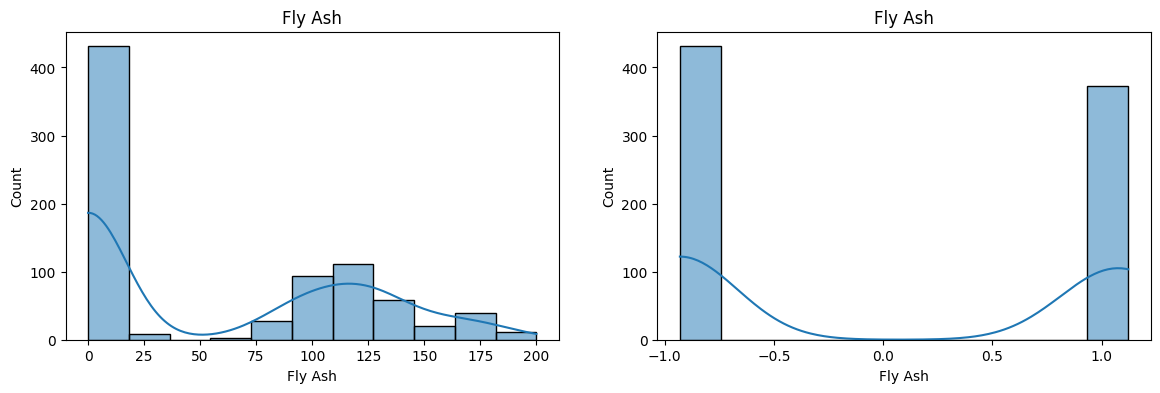

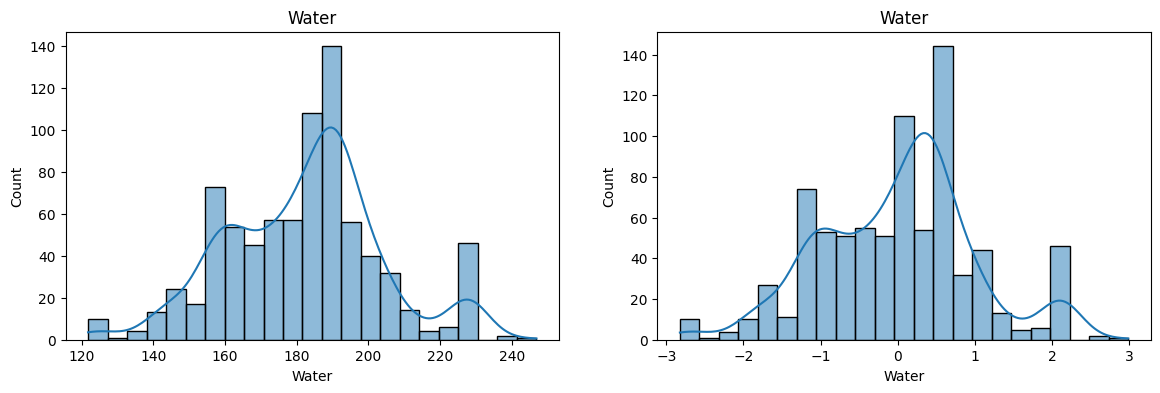

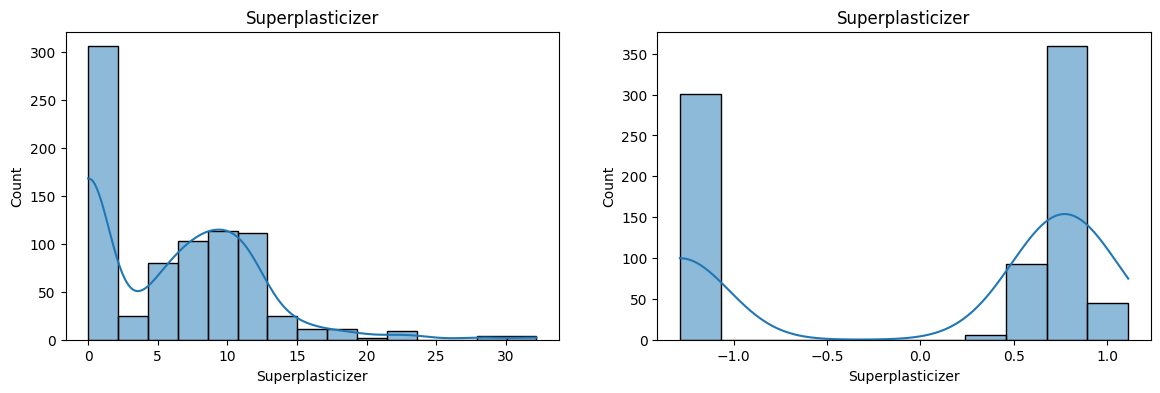

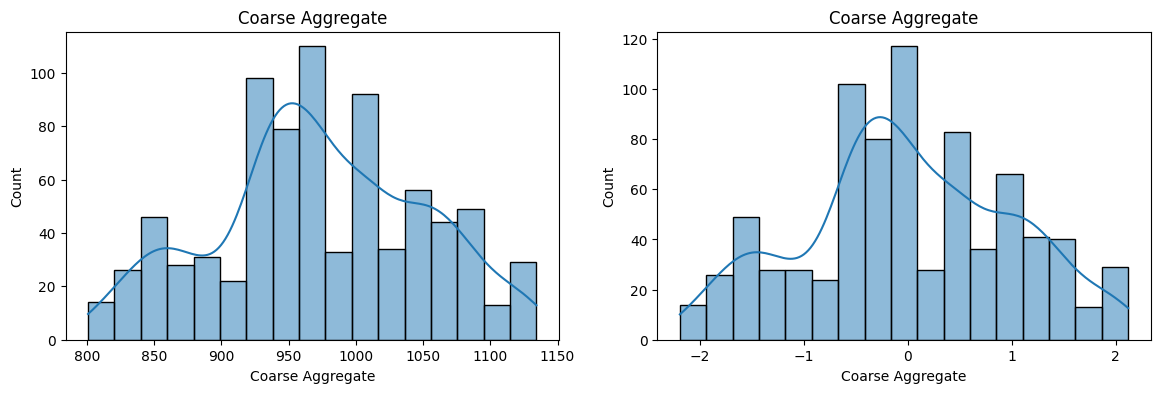

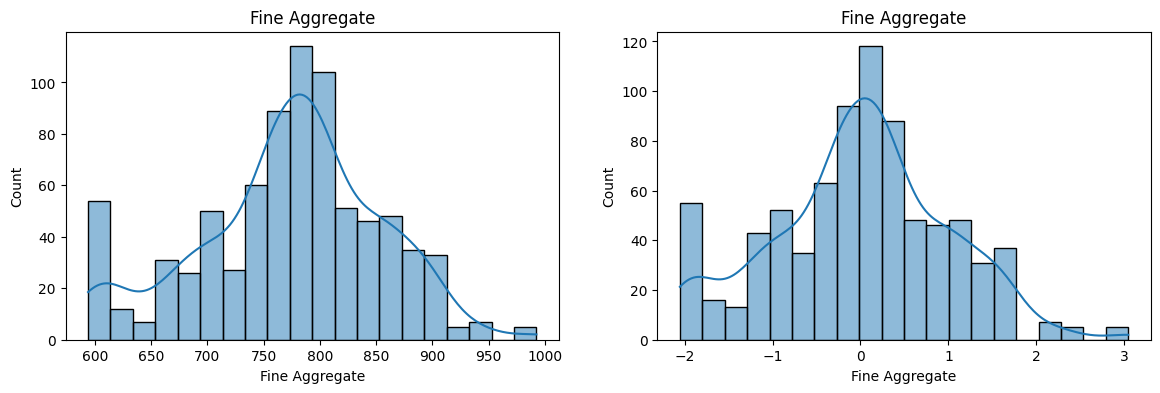

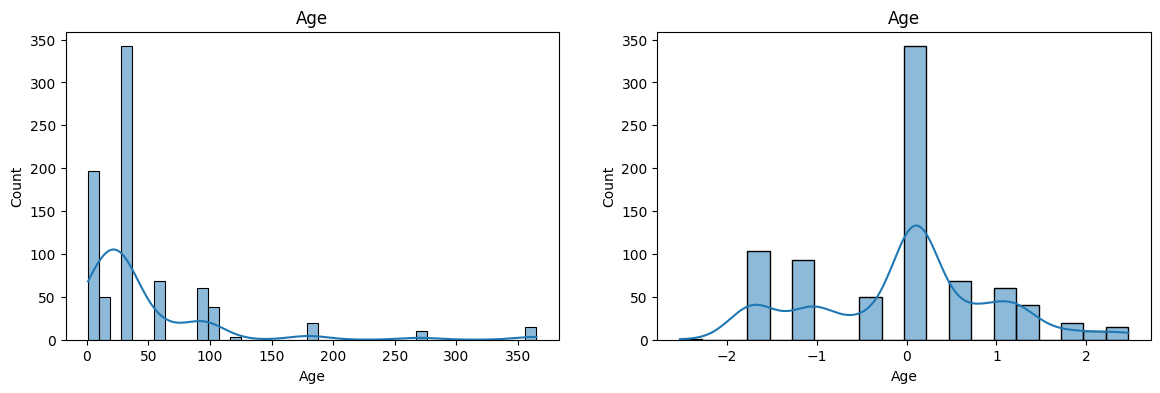

In [71]:
#Before and after comparision using histplot 
X_train_transformed=pd.DataFrame(data=X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(col)

    plt.show()

In [69]:
X_train.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [70]:
X_train_transformed.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [73]:
pt1=PowerTransformer()
X_train_transformed1=pt1.fit_transform(X_train)
X_test_transformed1=pt1.transform(X_test)

In [74]:
LR2=LinearRegression()
LR2.fit(X_train_transformed1,y_train)
prediction2=LR2.predict(X_test_transformed1)
r2_score(y_test,prediction2)

0.795556056917335

In [75]:
X_transformed1=pt1.fit_transform(X)
np.mean(cross_val_score(LR2,X_transformed1,y,scoring='r2'))

0.6938787274365763

In [76]:
X_train_transformed1=pd.DataFrame(data=X_train_transformed1,columns=X_train.columns)

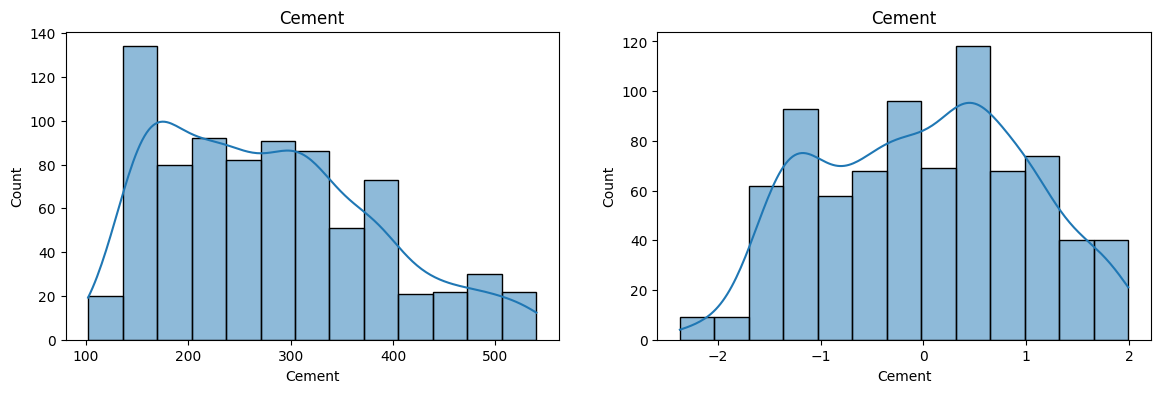

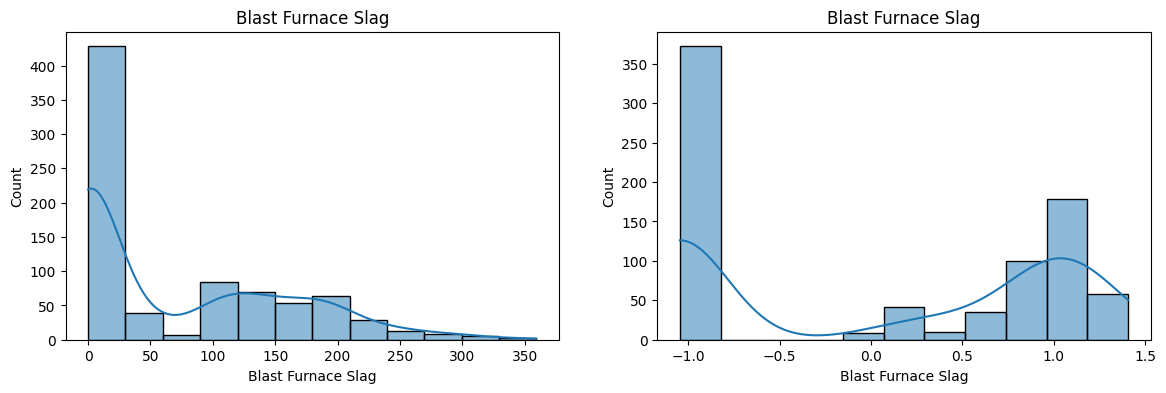

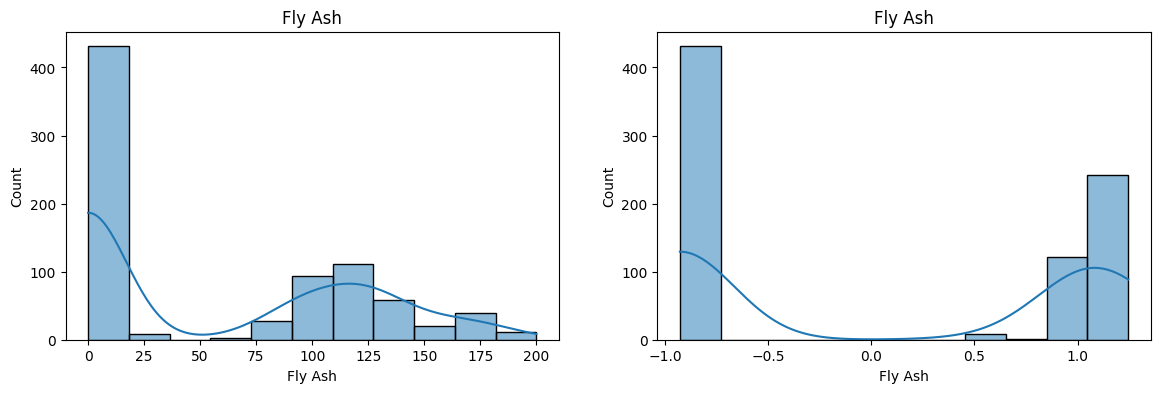

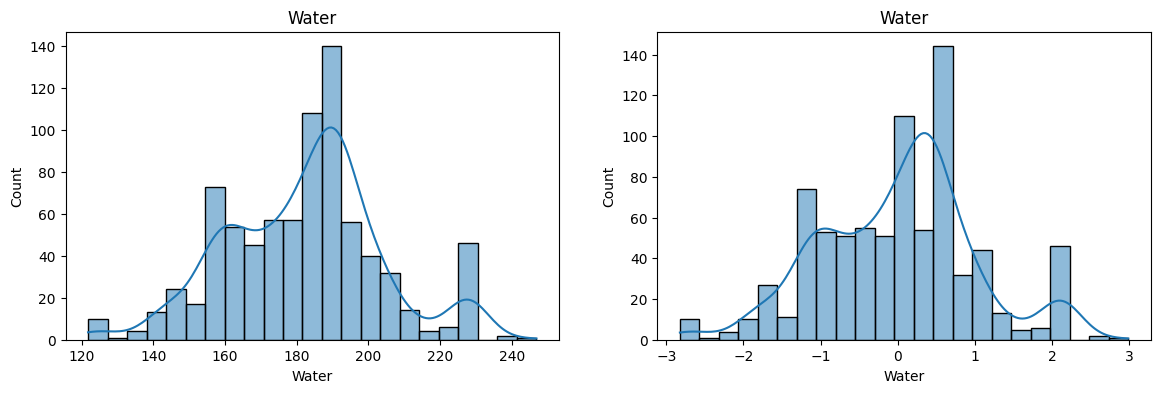

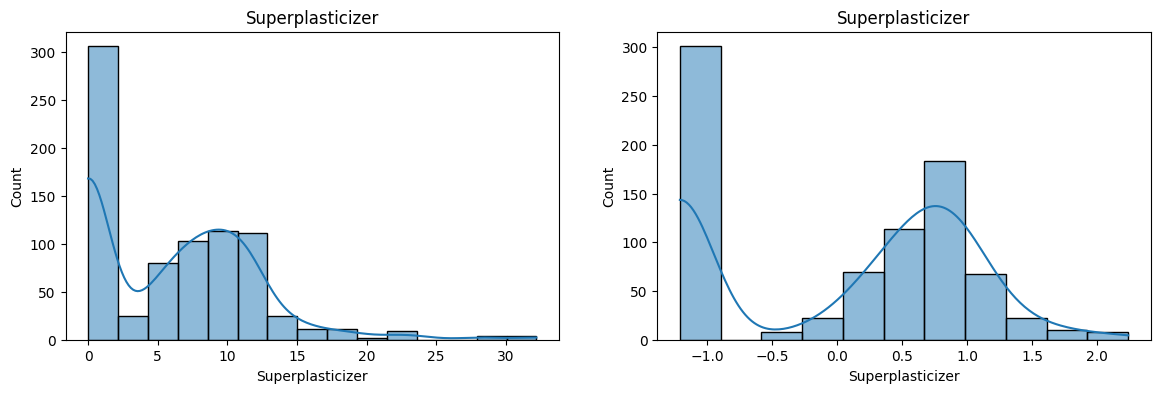

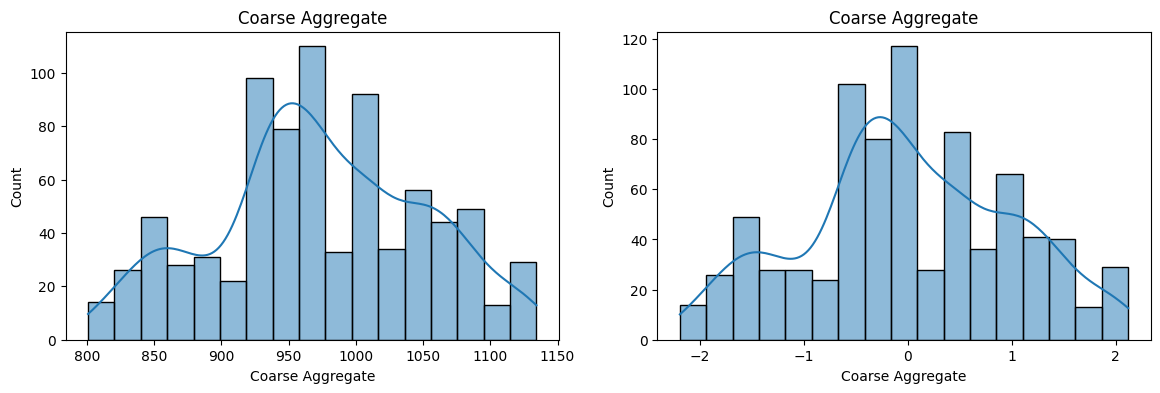

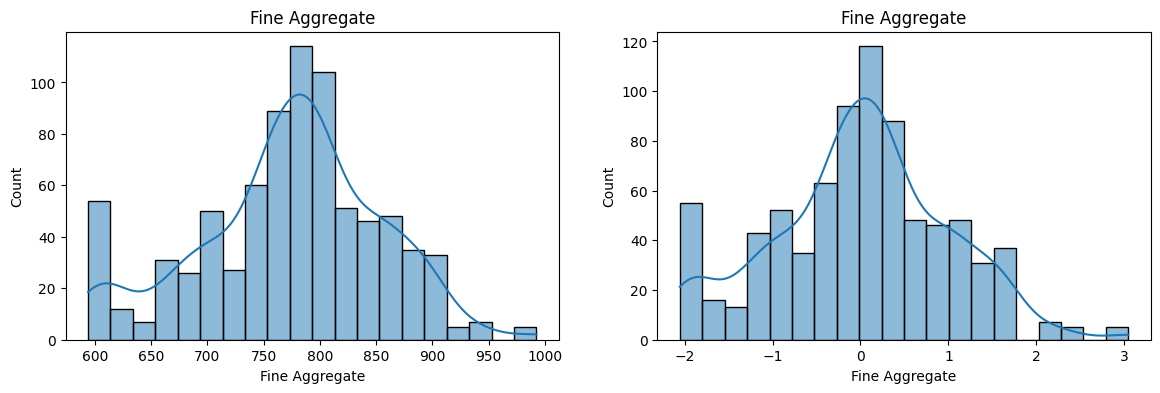

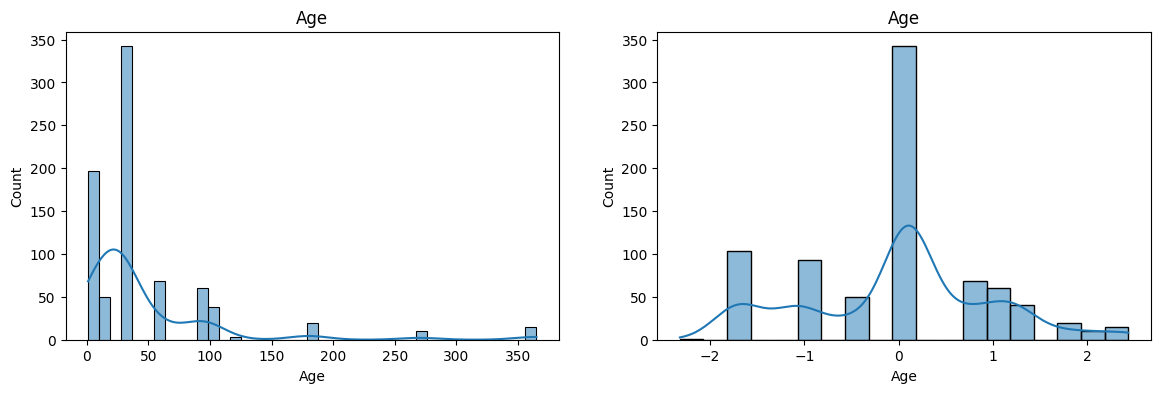

In [77]:
for col in X_train_transformed1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed1[col],kde=True)
    plt.title(col)

    plt.show()

In [78]:
pd.DataFrame({'cols':X_train.columns,'box_cox':pt.lambdas_,'yeo_johnson':pt1.lambdas_})

,cols,box_cox,yeo_johnson
0,Cement,0.116625,0.113625
1,Blast Furnace Slag,0.018672,-0.005725
2,Fly Ash,-0.025092,-0.109164
3,Water,0.923823,0.923320
4,Superplasticizer,0.093183,0.238200
5,Coarse Aggregate,1.265408,1.265774
6,Fine Aggregate,1.825456,1.826589
7,Age,0.045667,-0.001972
